In [9]:
#this program will try to follow a 
#black line (some black electrical tape)
#on a white foam board.
#you can try with different materials.

from zumi.zumi import Zumi
import time

zumi = Zumi()

#time program will last
time_out =10
time_passed = 0
init_time = time.time()
#threshold for right and left bottom ir sensors
th1 = 100
th2 = 100
#remember the ir sensor is saved as a 
#byte which is 8 bits 2^8-1 = 255
#so choose a threshold that is between 0 - 255
#also both IR sensor will vary from each other 
#so the threshold may be different

#this is the basic line following program
try:
    print("starting")
    while(time_passed <= time_out):
        #grab ir values
        ir_readings = zumi.get_all_IR_data()
        
        #make the ir values binary/true or false
        if ir_readings[1] > th1:
            bottom_right_ir = True
        else:
            bottom_right_ir = False

        if ir_readings[3] > th1:
            bottom_left_ir = True
        else:
            bottom_left_ir = False
            
        #now you have 4 states for the 2 IR sensors
        if bottom_right_ir and bottom_left_ir:
            zumi.control_motors(10,10)
            #both detecting black line
        elif bottom_right_ir and not bottom_left_ir:
            zumi.control_motors(10,50)
            #right side detecting black line
        elif not bottom_right_ir and bottom_left_ir:
            zumi.control_motors(50,10)
            #left side detecting black line 
        elif not bottom_right_ir and not bottom_left_ir:
            zumi.stop()
            #no black line detected at all. 
            
        #update the time passed
        time_passed = time.time()-init_time

finally:
    zumi.stop()
    print("done")


Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
starting
done


In [1]:
from zumi.zumi import Zumi
import time
zumi = Zumi()

def line_follower(time_out,speed = 5,left_thresh=100,right_thresh=100, gain = 0.1):
    #this method will try to follow a black line on a white floor.
    #if both ir sensors detect white the Zumi will stop.
    #timeout is the amount of time you want to do line following
    #speed is base speed the motors will go forward at.
    #left thresh is the left bottom ir threshold the sensor
    #goes from 0-255 so its like a cuttoff point
    #same for right thresh but for right bottom ir sensor
    #gain is how sensitive your line following code will 
    #be to difference between the left and right ir sensors
    #if your Zumi shakes a lot left to right then try to make the gain smaller
    #if your zumi cant make sharp turns increase the gain by +0.1
    time_passed = 0
    init_time = time.time()
    try:
        while(time_passed <= time_out):
            ir_readings = zumi.get_all_IR_data()
            left_bottom_ir = ir_readings[3]
            right_bottom_ir = ir_readings[1]
            
            #this is the difference between the left and right ir sensor
            #when the left value is bigger than the right then the diff will be positive
            #if the right value if bigger than the left then the diff will be negative
            diff = int((left_bottom_ir - right_bottom_ir)*gain)

            if left_bottom_ir < left_thresh and right_bottom_ir < right_thresh:
                #if both ir sensors detect white then we stop
                zumi.stop()
            elif diff > 1:
                zumi.control_motors(speed+diff,speed)
            elif diff < 1:
                zumi.control_motors(speed,speed+abs(diff))
            else:
                #if the difference is close to 0 lets just drive forward
                zumi.control_motors(10+diff,10-diff)
            #update the time passed
            time_passed = time.time()-init_time
    finally:
        #always have a stop at the end of code with control motors
        zumi.stop()

#run the function for 60 seconds
line_follower(10)

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


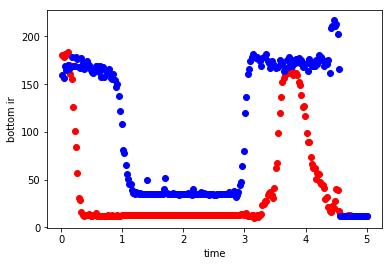

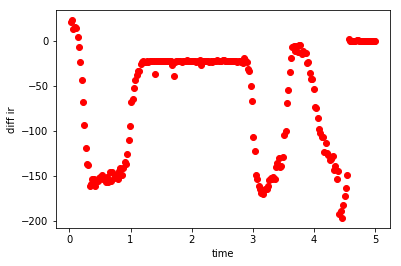

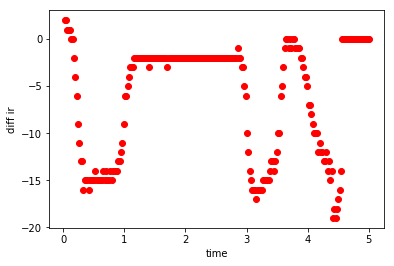

In [12]:
from zumi.zumi import Zumi
import matplotlib
import matplotlib.pyplot as plt
import time
zumi = Zumi()

def line_follower(time_out,speed = 5,left_thresh=100,right_thresh=100, gain = 0.1):
    time_list = []
    r_bott_list = []
    l_bott_list = []
    ir_diff_list = []
    bin_ir = []
    #this method will try to follow a black line on a white floor.
    #if both ir sensors detect white the Zumi will stop.
    #timeout is the amount of time you want to do line following
    #speed is base speed the motors will go forward at.
    #left thresh is the left bottom ir threshold the sensor
    #goes from 0-255 so its like a cuttoff point
    #same for right thresh but for right bottom ir sensor
    #gain is how sensitive your line following code will 
    #be to difference between the left and right ir sensors
    #if your Zumi shakes a lot left to right then try to make the gain smaller
    #if your zumi cant make sharp turns increase the gain by +0.1
    time_passed = 0
    init_time = time.time()
    try:
        while(time_passed <= time_out):
            ir_readings = zumi.get_all_IR_data()
            left_bottom_ir = ir_readings[3]
            right_bottom_ir = ir_readings[1]
            bottom_right_ir = ir_readings[1]
            bottom_left_ir = ir_readings[3]
            r_bott_list.append(bottom_right_ir)
            l_bott_list.append(bottom_left_ir)
            
            #this is the difference between the left and right ir sensor
            #when the left value is bigger than the right then the diff will be positive
            #if the right value if bigger than the left then the diff will be negative
            diff = int((left_bottom_ir - right_bottom_ir)*gain)
            ir_diff_list.append(left_bottom_ir - right_bottom_ir)
            bin_ir.append(diff)
            if left_bottom_ir < left_thresh and right_bottom_ir < right_thresh:
                #if both ir sensors detect white then we stop
                zumi.stop()
            elif diff > 1:
                zumi.control_motors(speed+diff,speed)
            elif diff < 1:
                zumi.control_motors(speed,speed+abs(diff))
            else:
                #if the difference is close to 0 lets just drive forward
                zumi.control_motors(10+diff,10-diff)
            #update the time passed
            time_passed = time.time()-init_time
            time_list.append(time_passed)
    finally:
        #always have a stop at the end of code with control motors
        zumi.stop()
        plt.plot(time_list,l_bott_list,'ro',time_list,r_bott_list,'bo')
        plt.ylabel('bottom ir')
        plt.xlabel('time')
        plt.show()
        plt.plot(time_list,ir_diff_list,'ro')
        plt.ylabel('diff ir')
        plt.xlabel('time')
        plt.show()

        plt.plot(time_list,bin_ir,'ro')
        plt.ylabel('diff ir')
        plt.xlabel('time')
        plt.show()

#run the function for 60 seconds
line_follower(5)